#### MODULES

In [15]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

# show all columns
pd.set_option('display.max_columns', None)



In [2]:
# Keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Torch

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

#### IMPORT DATA

In [244]:
airbnb = pd.read_csv('./Airbnb/listings_new_2.csv')
airbnb = airbnb.drop(columns=['Unnamed: 0'])

#airbnb_scaled = pd.read_csv('./Airbnb/airbnb_scaled.csv')
#airbnb_scaled = airbnb_scaled.drop(columns=['Unnamed: 0'])


#### CREATE DUMMIES

In [245]:
# Select features
airbnb_model = airbnb[['neighbourhood', 'price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
                      'beds', 'bed_type', 'guests_included','minimum_nights', 
                      'instant_bookable', 'cancellation_policy']]

In [246]:
# Get dummies
airbnb_model_dummies = pd.get_dummies(data = airbnb_model, 
                              columns=['neighbourhood', 'property_type', 'room_type', 
                                       'bed_type', 'instant_bookable', 'cancellation_policy'], drop_first=True) 

In [247]:
# Remove missing values
airbnb_model_dummies = airbnb_model_dummies.dropna()

#### REMOVE OUTLIERS

Identifying the outliers

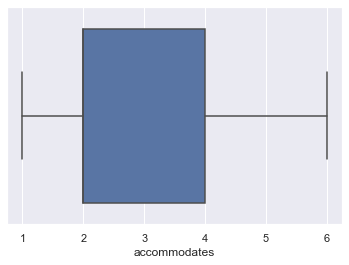

In [157]:
df = airbnb_model_dummies[airbnb_model_dummies['accommodates'] < 7]
#df['accommodates'].sort_values(ascending=False)
sns.boxplot(x=df['accommodates'])

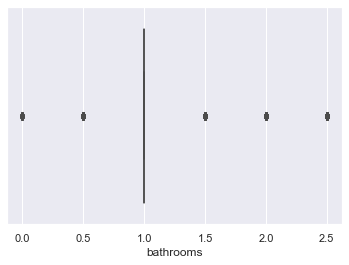

In [137]:
df = airbnb_model_dummies[airbnb_model_dummies['bathrooms'] < 3]
sns.boxplot(x=df['bathrooms'])

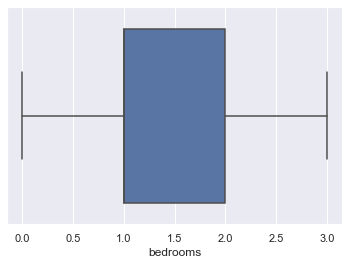

In [138]:
df = airbnb_model_dummies[airbnb_model_dummies['bedrooms'] < 4]
sns.boxplot(x=df['bedrooms'])

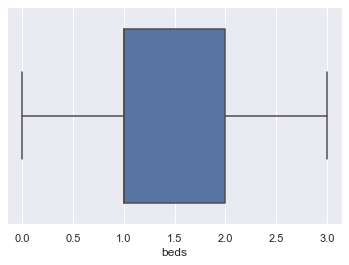

In [142]:
df = airbnb_model_dummies[airbnb_model_dummies['beds'] < 4]
sns.boxplot(x=df['beds'])

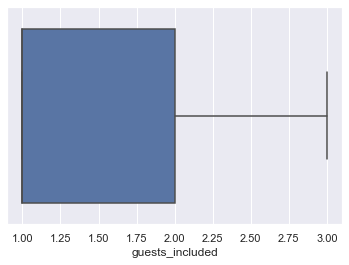

In [145]:
df = airbnb_model_dummies[airbnb_model_dummies['guests_included'] < 4]
sns.boxplot(x=df['guests_included'])

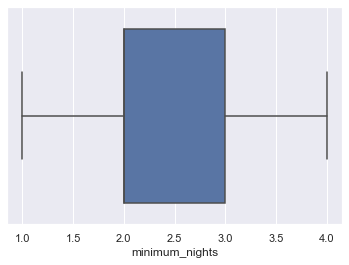

In [151]:
df = airbnb_model_dummies[airbnb_model_dummies['minimum_nights'] < 5]
sns.boxplot(x=df['minimum_nights'])

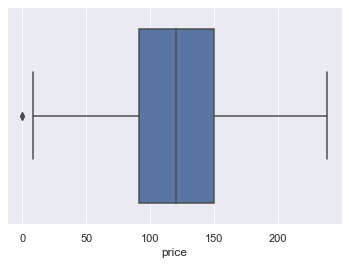

In [234]:
df = airbnb_model_dummies[airbnb_model_dummies['price'] < 239]
sns.boxplot(x=df['price'])

In [248]:
# Remove outliers

airbnb_no_outl = airbnb_model_dummies[airbnb_model_dummies['accommodates'] <= 7]
airbnb_no_outl_2 = airbnb_no_outl[airbnb_no_outl['bathrooms'] <= 3]
airbnb_no_outl_3 = airbnb_no_outl_2[airbnb_no_outl_2['bedrooms'] <= 4]
airbnb_no_outl_4 = airbnb_no_outl_3[airbnb_no_outl_3['beds'] <= 4]
airbnb_no_outl_5 = airbnb_no_outl_4[airbnb_no_outl_4['guests_included'] <= 4]
airbnb_no_outl_7 = airbnb_no_outl_5[airbnb_no_outl_5['minimum_nights'] <= 5]
airbnb_no_outl_8 = airbnb_no_outl_7[airbnb_no_outl_7['price'] > 0]
airbnb_no_outl_6 = airbnb_no_outl_8[airbnb_no_outl_8['price'] <= 239]


In [249]:
airbnb_no_outl_6.shape

(16245, 68)

#### NORMALIZE

In [250]:
# Normalize the following columns: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights'] 

min_max_scaler = MinMaxScaler()
airbnb_scale = min_max_scaler.fit_transform(airbnb_no_outl_6[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights']])

airbnb_scale_df = pd.DataFrame(airbnb_scale, index=airbnb_no_outl_6.index, columns=['accommodates', 'bathrooms', 'bedrooms', 
                                                                                        'beds', 'guests_included', 'minimum_nights'])
airbnb_scale_df.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights
0,0.166667,0.500000,0.25,0.50,0.000000,0.50
1,0.666667,0.333333,0.50,0.50,0.333333,0.75
2,0.166667,0.333333,0.25,0.25,0.333333,0.00
4,0.166667,0.333333,0.25,0.25,0.000000,0.25
5,0.166667,0.333333,0.25,0.50,0.333333,0.50


In [251]:
airbnb_no_outl_7 = airbnb_no_outl_6.drop(columns=['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights'])
airbnb_no_outl_7 = airbnb_no_outl_7.reset_index()

In [252]:
airbnb_scale_df = airbnb_scale_df.reset_index()
airbnb_scale_df.head()

,index,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights
0,0,0.166667,0.500000,0.25,0.50,0.000000,0.50
1,1,0.666667,0.333333,0.50,0.50,0.333333,0.75
2,2,0.166667,0.333333,0.25,0.25,0.333333,0.00
3,4,0.166667,0.333333,0.25,0.25,0.000000,0.25
4,5,0.166667,0.333333,0.25,0.50,0.333333,0.50


In [253]:
# merge
airbnb_scaled = pd.merge(airbnb_scale_df, airbnb_no_outl_7, on='index')

In [254]:
airbnb_scaled = airbnb_scaled.drop(columns='index')

In [255]:
# Move 'price' column to front
airbnb_scaled = airbnb_scaled.set_index('price').reset_index()

In [256]:
airbnb_scaled.head()

,price,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Campsite,property_type_Casa particular (Cuba),property_type_Castle,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Lighthouse,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_60
0,59,0.166667,0.500000,0.25,0.50,0.000000,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
1,160,0.666667,0.333333,0.50,0.50,0.333333,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,80,0.166667,0.333333,0.25,0.25,0.333333,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,150,0.166667,0.333333,0.25,0.25,0.000000,0.25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,65,0.166667,0.333333,0.25,0.50,0.333333,0.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [184]:
#airbnb_scaled.to_csv('airbnb_scaled.csv')

#### REVIEW DATA

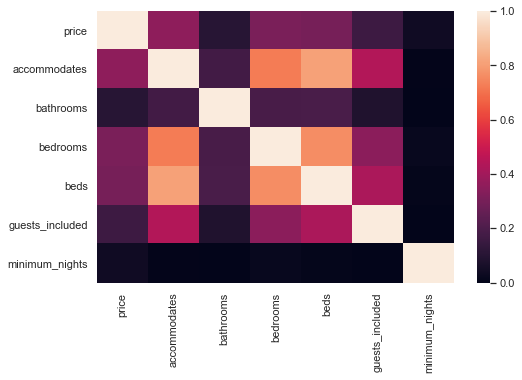

In [189]:
# Heatmap
f, axes = plt.subplots(1, figsize=(8,5))
sns.heatmap(airbnb_model.corr())

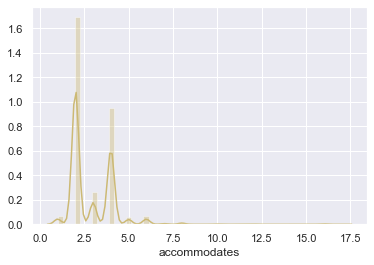

In [191]:
sns.distplot(airbnb_model['accommodates'], color=random.choice(colors))

##### BOSTON HOUSING EXAMPLE

In [200]:
Y = airbnb_model_dummies['price'] 
X = airbnb_model_dummies[airbnb_model_dummies.columns.difference(['price'])]
print(X.shape)
print(Y.shape)

(20006, 68)
(20006,)


In [201]:
seed      = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)


In [202]:
folds   = 10
metric  = "neg_mean_squared_error"

In [203]:
# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

In [204]:
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -19587.081, 19221.954
Lasso: -19683.598, 19258.086
ElasticNet: -19623.482, 19604.25
KNN: -22269.135, 20111.27
DecisionTree: -31778.148, 25610.146


C:\Users\anete\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [107]:
# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.savefig("model_mse_scores.png")
plt.clf()
plt.close()

### REGRESSION MODELS

Random Forest Regressor

In [193]:
airbnb_scaled.head()

,price,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Campsite,property_type_Casa particular (Cuba),property_type_Castle,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Lighthouse,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_60
0,59,0.2,0.6,0.333333,0.666667,0.0,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
1,160,0.8,0.4,0.666667,0.666667,0.5,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,80,0.2,0.4,0.333333,0.333333,0.5,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,150,0.2,0.4,0.333333,0.333333,0.0,0.333333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,65,0.2,0.4,0.333333,0.666667,0.5,0.666667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [257]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

In [258]:
y = airbnb_scaled['price'] 
X = airbnb_scaled[airbnb_scaled.columns.difference(['price'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [261]:
#### Random Forrest Regressor

rfr_2 = RandomForestRegressor(max_depth=15).fit(X_train, y_train)
y_pred_train_2 = rfr_2.predict(X_train)
y_pred_test_2 = rfr_2.predict(X_test)
score_train_2 = performance_metric(y_train, y_pred_train_2)

score_test_2 = performance_metric(y_test, y_pred_test_2)

print('Max depth 2:','\nTrain set',score_train_2, 'Test set', score_test_2)

C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max depth 2: 
Train set 0.5694078092703216 Test set 0.37471271910600557


Linear Regression

In [262]:
from sklearn.linear_model import LinearRegression

y = airbnb_scaled['price'] 
X = airbnb_scaled[airbnb_scaled.columns.difference(['price'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression().fit(X_train, y_train)


In [263]:
y_pred = regressor.predict(X_test)

test_set_r2 = r2_score(y_test, y_pred)
print('R-squared:',test_set_r2)

R-squared: 0.4242167393018357


### Neural Networks

#### KERAS

In [264]:
# Convert data to numpy arrays
dataset = airbnb_scaled.values

In [265]:
Y = dataset[:,0]
X = dataset[:,1:]

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

# split 'X_val_and_test' and 'Y_val_and_test'
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(11371, 67) (2437, 67) (2437, 67) (11371,) (2437,) (2437,)


In [266]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(67,)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear'),
])

In [267]:
# telling which algorithm use for optimization, what function to use for loss optimization,
# and accuracy metrics

model.compile(optimizer='adam',
              loss='mse')

In [268]:
# Training the data

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Train on 11371 samples, validate on 2437 samples
Epoch 1/10
11371/11371 [==============================] - 1s 72us/step - loss: 7362.9694 - val_loss: 1534.4228
Epoch 2/10
11371/11371 [==============================] - 1s 47us/step - loss: 1378.0161 - val_loss: 1272.2356
Epoch 3/10
11371/11371 [==============================] - 1s 47us/step - loss: 1213.6689 - val_loss: 1195.5437
Epoch 4/10
11371/11371 [==============================] - 1s 48us/step - loss: 1167.6640 - val_loss: 1171.0839
Epoch 5/10
11371/11371 [==============================] - 1s 48us/step - loss: 1153.5901 - val_loss: 1167.0623
Epoch 6/10
11371/11371 [==============================] - 1s 48us/step - loss: 1145.5899 - val_loss: 1156.9521
Epoch 7/10
11371/11371 [==============================] - 1s 50us/step - loss: 1142.3386 - val_loss: 1156.0710
Epoch 8/10
11371/11371 [==============================] - 1s 47us/step - loss: 1140.5536 - val_loss: 1164.4230
Epoch 9/10
11371/11371 [==============================] - 1s 48

In [269]:
model.evaluate(X_test, Y_test)


2437/2437 [==============================] - 0s 20us/step


1119.8312138810625

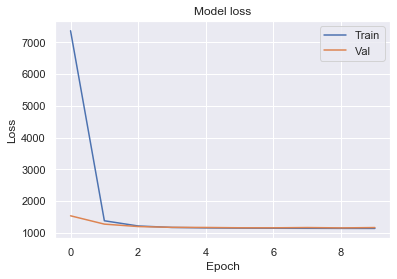

In [270]:
# visualize the training loss and the validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Categorical predictions with Keras

In [272]:
# Split price into two categories below mean / above mean (123)

airbnb_scaled['price_cat'] = np.where(airbnb_scaled['price'] >= 124, 1, 0)

In [271]:
airbnb_scaled.price.describe()

count    16245.000000
mean       123.696337
std         43.369978
min          8.000000
25%         90.000000
50%        120.000000
75%        150.000000
max        239.000000
Name: price, dtype: float64

In [273]:
airbnb_scaled = airbnb_scaled.set_index('price_cat').reset_index()

In [275]:
# Convert data to numpy arrays
dataset = airbnb_scaled.values

In [276]:
Y = dataset[:,0] 
X = dataset[:,2:]

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

# split 'X_val_and_test' and 'Y_val_and_test'
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(11371, 67) (2437, 67) (2437, 67) (11371,) (2437,) (2437,)


In [279]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(67,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [280]:
# telling which algorithm use for optimization, what function to use for loss optimization,
# and accuracy metrics

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [281]:
# Training the data

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=5,
          validation_data=(X_val, Y_val))

Train on 11371 samples, validate on 2437 samples
Epoch 1/5
11371/11371 [==============================] - 1s 80us/step - loss: 0.6710 - accuracy: 0.5952 - val_loss: 0.6667 - val_accuracy: 0.5872
Epoch 2/5
11371/11371 [==============================] - 1s 55us/step - loss: 0.6476 - accuracy: 0.6369 - val_loss: 0.6411 - val_accuracy: 0.6385
Epoch 3/5
11371/11371 [==============================] - 1s 56us/step - loss: 0.6195 - accuracy: 0.6737 - val_loss: 0.6116 - val_accuracy: 0.6676
Epoch 4/5
11371/11371 [==============================] - 1s 56us/step - loss: 0.5929 - accuracy: 0.6899 - val_loss: 0.5879 - val_accuracy: 0.6877
Epoch 5/5
11371/11371 [==============================] - 1s 56us/step - loss: 0.5741 - accuracy: 0.6994 - val_loss: 0.5738 - val_accuracy: 0.6922


In [282]:
model.evaluate(X_test, Y_test)

2437/2437 [==============================] - 0s 20us/step


[0.5739016311673488, 0.7025030851364136]

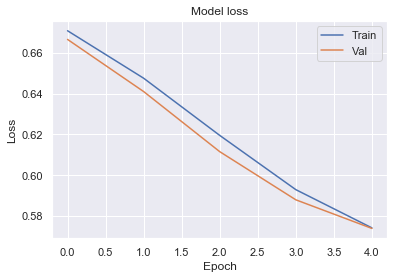

In [283]:
# visualize the training loss and the validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

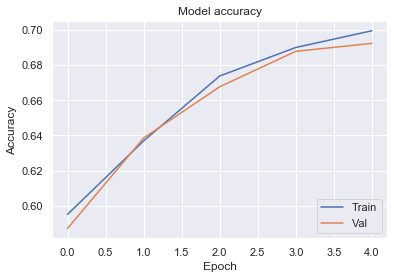

In [286]:
# visualize the training accuracy and validation accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# Increase epochs

#### TORCH

In [99]:
train = airbnb_model_dummies[:10000]
test = airbnb_model_dummies[10000:]
test = test.drop('price', axis=1)

In [117]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('price', axis=1), 
                                                  train['price'], test_size=0.2, random_state=42)

In [118]:
X_train.to_numpy()
X_val.to_numpy()
y_train.to_numpy()
y_val.to_numpy()

array([ 89,  85,  75, ..., 149, 110, 105], dtype=int64)

In [125]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(160, 68)
        self.fc2 = nn.Linear(68, 50)
        self.fc3 = nn.Linear(50, 18)
        self.fc4 = nn.Linear(18, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        return x

In [126]:
train_batch = np.array_split(X_train, 50)
label_batch = np.array_split(y_train, 50)

In [130]:
train_batch.to_numpy()

list

In [ ]:
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
    #print(train_batch[i])

for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)

X_val = torch.from_numpy(X_val.values).float()
y_val = torch.from_numpy(y_val.values).float().view(-1, 1)

In [128]:
type(train_batch[0])

torch.Tensor

In [ ]:
model = Regressor()
new = train_batch[0]
ps = model(new)
ps.shape

In [ ]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 300

train_losses, test_losses = [], []
for e in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(train_batch)):
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = torch.sqrt(criterion(torch.log(output), torch.log(label_batch[i])))
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    else:
            test_loss = 0
            accuracy = 0

            with torch.no_grad():
                model.eval()
                predictions = model(X_val)
                test_loss += torch.sqrt(criterion(torch.log(predictions), torch.log(y_val)))

            train_losses.append(train_loss/len(train_batch))
            test_losses.append(test_loss)

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(train_loss/len(train_batch)),
                  "Test Loss: {:.3f}.. ".format(test_loss))
